### 2021 Spring "EE479: Scientific Computing & Data"
#### Hyeonwoo Yeo, KAIST Electrical Engineering

#### 1. Solving time-independent one-dimensional (1-D) Schrödinger equation using matrix diagonalization

###### 2021. 05. 11

###### To solve:
 $ -\dfrac{\hbar^2}{2m} \, \dfrac{\mathrm{d}^2 \psi}{\mathrm{d} x^2} + V(x)\psi = H\psi = E\psi $ ( $ Ax = \lambda x $ )
 
###### Algorithm:


1. Define Laplacian using FDM and external Potential for 1-D Hamiltonian.

2. Construct 1-D Hamiltonian using the information from step 1 

3. Diagonalize the Hamiltonian using numpy.eigh and get eigenvalues ($E_n$) and eigenvectors ($\psi$).

4. Visualize.


In [1]:
import numpy as np
import numpy.linalg as lin
from matplotlib import pyplot as plt

# Define FDM points & coefficients (From the definition in wikipedia)
def fdmcoefficient(l):
    a=np.zeros((2*l+1,2*l+1))
    b=np.zeros(2*l+1)
    c=np.zeros(2*l+1)

    for i in range(0, 2*l+1):
        for j in range(0, 2*l+1):
            a[i,j]= (j-l)**i
    c[2]=2*1   #2!
    a = lin.inv(a)
    b= np.matmul(a, c)

    C=np.zeros((l+1))

    for i in range(0, l+1):
        C[i]=b[i+l]
    return C


# Define the Laplacian for Hamiltonian
def Laplacian(n, l, dx):
    C=fdmcoefficient(l)
    oprt=np.zeros((n,n))
    for i in range(n):
        for j in range(-l, l + 1, 1):
            k = i + j
            if (k >= n):
                k -= n
                oprt[i][k] = C[abs(j)] / (dx**2)
            elif (k<0):
                k += n
                oprt[i][k] = C[abs(j)] / (dx**2)
            else:
                oprt[i][k] = C[abs(j)] / (dx**2)
    return oprt


# Set shapes of potential
def Potential(L,n):
    grd=np.zeros(n)
    grd[:]=0
        
    grd[0] = 1000000000
    grd[n-1]=1000000000
     
    if pot_shape == 0:
        for i in range(1, n-1):
            grd[i] = grd[i]
            
    if pot_shape == 1:                               # Harmonic
        for i in range(1, n-1):
            grd[i]=(i-(n-1)//2)**2/((n-1)//2)**2
            grd[i]=grd[i]*pot_height_har
                  
    if pot_shape == 2:                               # Square well 
        for i in range(1,(4*n)//10):
            grd[i] = pot_height_har
        for i in range((4*n)//10,(6*n)//10+1):
            grd[i] = 0
        for i in range((6*n)//10+1,n-1):
            grd[i] = pot_height_har
        
    if pot_shape == 3:                               #Triangular
        grd[:]=10**6
        for i in range((5*n)//10,n):
            grd[i] = pot_height_har*abs(i-500)/500

    if pot_shape == 4:                              #Asymmetric infinite Well
        for i in range((5*n//10), n-2):
            grd[i] = pot_height_har                 # eV unit



    return grd

In [2]:

#Input parameters         
Lx = 100                         # Box Length (Angstrom = 10^-10 m)
ngx = 1001                       # Number of grid points.  (spacing = L/(n-1))      
nstate = 5                      # Number of states to search  !!!! Must be integer
pot_height_eV = 25               # eV
pot_shape  = 3                   # 0: particle in a box (infinite well)
                                 # 1: Harmonic Oscillator
                                 # 2: Square Well
                                 # 3: Triangular Well 
                                 # 4: Asymmetric infinite well


1th state eigenvalue is 2.255190 eV
2th state eigenvalue is 3.976861 eV
3th state eigenvalue is 5.386407 eV
4th state eigenvalue is 6.632171 eV
5th state eigenvalue is 7.770963 eV


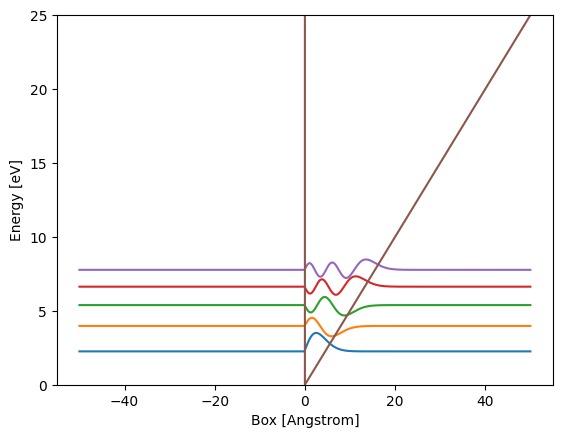

In [3]:
#Unit conversion
pot_height_har = pot_height_eV/27.211
ngx=ngx
l=3
Lx=Lx*1.88973
dx=Lx/(ngx)
nstate = nstate

# Define Hamiltonian using Potential and Laplacian
def Hamiltonian(L,n,l,dx):
    Hamiltonian = np.zeros((n,n))
    V = Potential(L, n)
    L = Laplacian(n, l, dx)                   # h- = 1, m_e = 1
    V_oprt=np.zeros((n,n))
    for i in range(0, n):
        V_oprt[i,i]=V[i]
    Hamiltonian = -L / 2. + V_oprt    # H = - (h-^2/2m) L + V
    return Hamiltonian

# Construct Hamiltonian using Potential and Laplacian
H=np.zeros((ngx, ngx))
dx=Lx/(ngx-1)
dn=np.ones(ngx)/dx**2
dno=np.ones(ngx-1)*(-1/2)/dx**2

V = Potential(Lx,ngx)
H = Hamiltonian(Lx, ngx, l, dx)

(w,v) = np.linalg.eigh(H)


#Make box & Visualize
a = np.linspace(-Lx/2, Lx/2, ngx)
a = a/1.89

#Print Eigenvalues
for i in range(0,nstate):
    print ('%dth state eigenvalue is %f eV' %(i+1,w[i]*27.211))

#Making Total figure
for i in range(0,nstate):
    height=pot_height_har*27.211/20
    len_height=np.max(v[:,i])-np.min(v[:,i])
    plt.plot(a,v[:,i]/len_height*height+np.ones(ngx)*w[i]*27.211)

plt.plot(a,V*27.211)
plt.ylim(0,pot_height_eV)
plt.ylabel('Energy [eV]')
plt.xlabel('Box [Angstrom]')
plt.show()


### For infinite potential problem:

$ E_n = $ $ \hbar^2(n\pi)^2 \over 2mL^2 $

For L = 100Å

$ E_1 = 0.003760 eV$  

$ E_2 = 0.015004 eV$  

$ E_3 = 0.033843 eV$  

$ E_4 = 0.060164 eV$  

$ E_5 = 0.094007 eV$